In [37]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_palette('Set2')
#sns.set_style('white')
import plotly.express as px
import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [38]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [42]:
# Sum of values equal zero in each column
for col in data[select_col]:
    print('{}:'.format(col) , data[data[col]==0].value_counts().sum())

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [43]:
# Value of median
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [44]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)

In [45]:
for col in data[select_col]:
    print('{}:'.format(col) , data[data[col]==0].value_counts().sum())

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


In [46]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


<ipython-input-47-d9b2783bbc0c>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




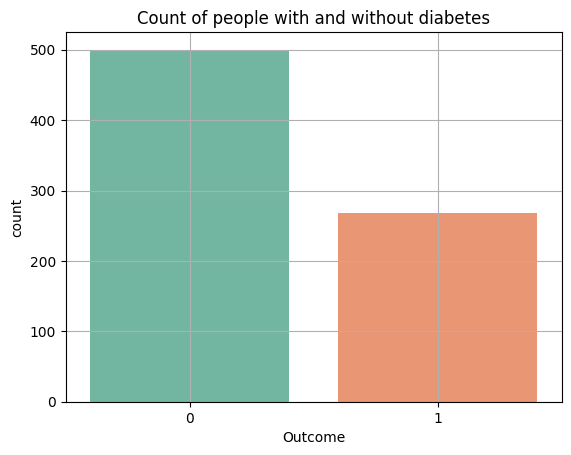

In [47]:
sns.countplot(x='Outcome',data=data, palette='Set2')
plt.title('Count of people with and without diabetes')
plt.grid()

In [48]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

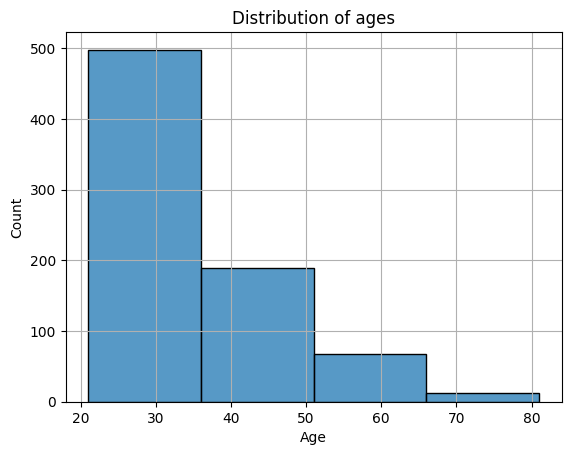

In [49]:
# Range of Ages
sns.histplot(data['Age'], bins=4)
plt.title('Distribution of ages')
plt.grid()

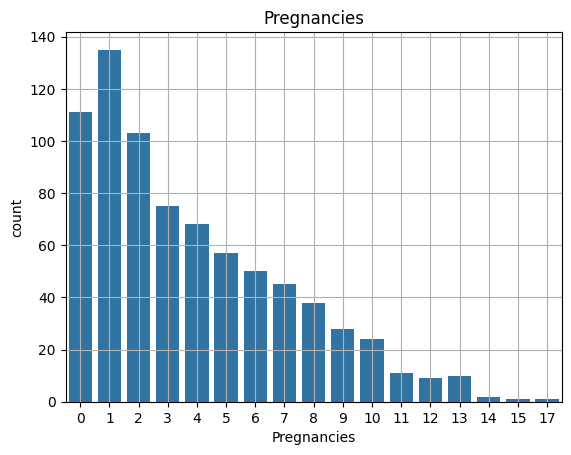

In [50]:
# Pregnancy count per woman
sns.countplot(x='Pregnancies', data=data)
plt.title('Pregnancies')
plt.grid()

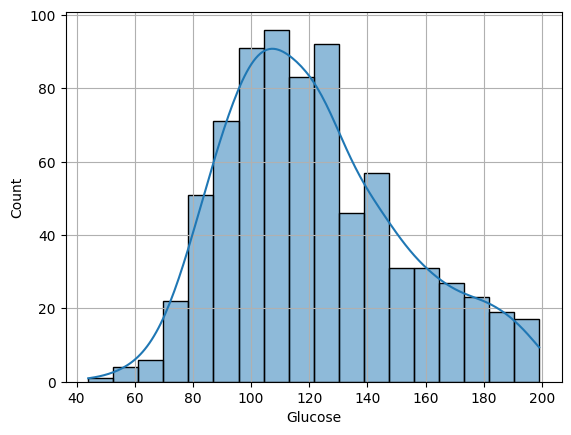

In [51]:
sns.histplot(data['Glucose'], kde=True)
plt.grid()

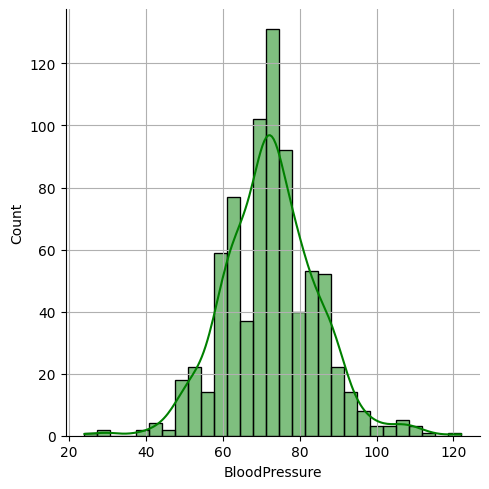

In [52]:
sns.displot(data['BloodPressure'],kde=True, color='green')
plt.grid()

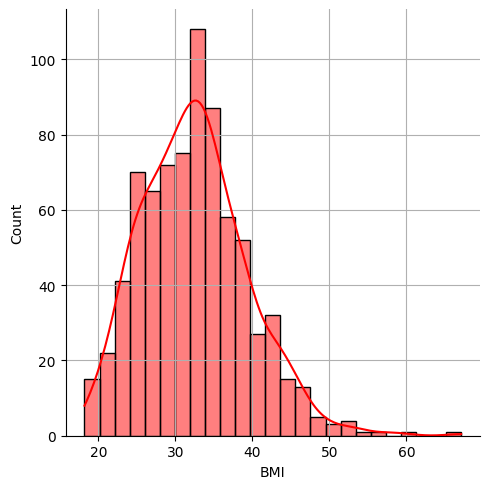

In [53]:
sns.displot(data['BMI'], kde=True, color='red')
plt.grid()

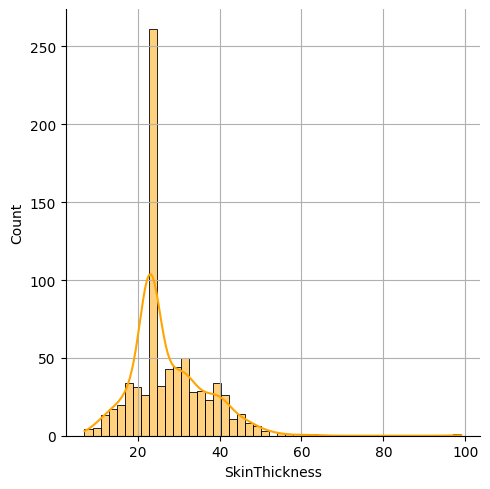

In [54]:
sns.displot(data['SkinThickness'], kde=True, color='orange')
plt.grid()

In [55]:
# Blood pressure lower than 80 is normal

fig = px.scatter(data, x="Age", y='BloodPressure',
             size="Glucose", color="Outcome",
                 hover_data=["BMI"], log_x=True, size_max=12,
                 color_continuous_scale=[[0, 'rgb(102, 194, 165)'], [1.0, 'rgb(225, 128, 114)']],
                 title="General view"
                 )
fig.add_shape(type="line",
    x0=20, y0=80, x1=85, y1=80,
    line=dict(color="blue",width=2,dash="dash")
 )

fig.show()

In [56]:
# We differentiate the data with Outcome 0 and 1
out_0 = data[data['Outcome']==0]
out_1 = data[data['Outcome']==1]

In [57]:
# We'll buil a function to represent de differents distributions with respect to "Outcome"
def visualization(variable):
    fig=go.Figure()
    fig.add_trace(go.Box(y=out_0[variable],name=0,marker_color='rgb(102, 194, 165)',boxpoints="all",whiskerwidth=0.3))
    fig.add_trace(go.Box(y=out_1[variable],name=1,marker_color='rgb(225, 128, 114)',boxpoints="all",whiskerwidth=0.3))
    fig.update_layout(title="{} distribution with respect to Outcome".format(variable),height=600)
    fig.show()

In [58]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in data[columns]:
    visualization(column)

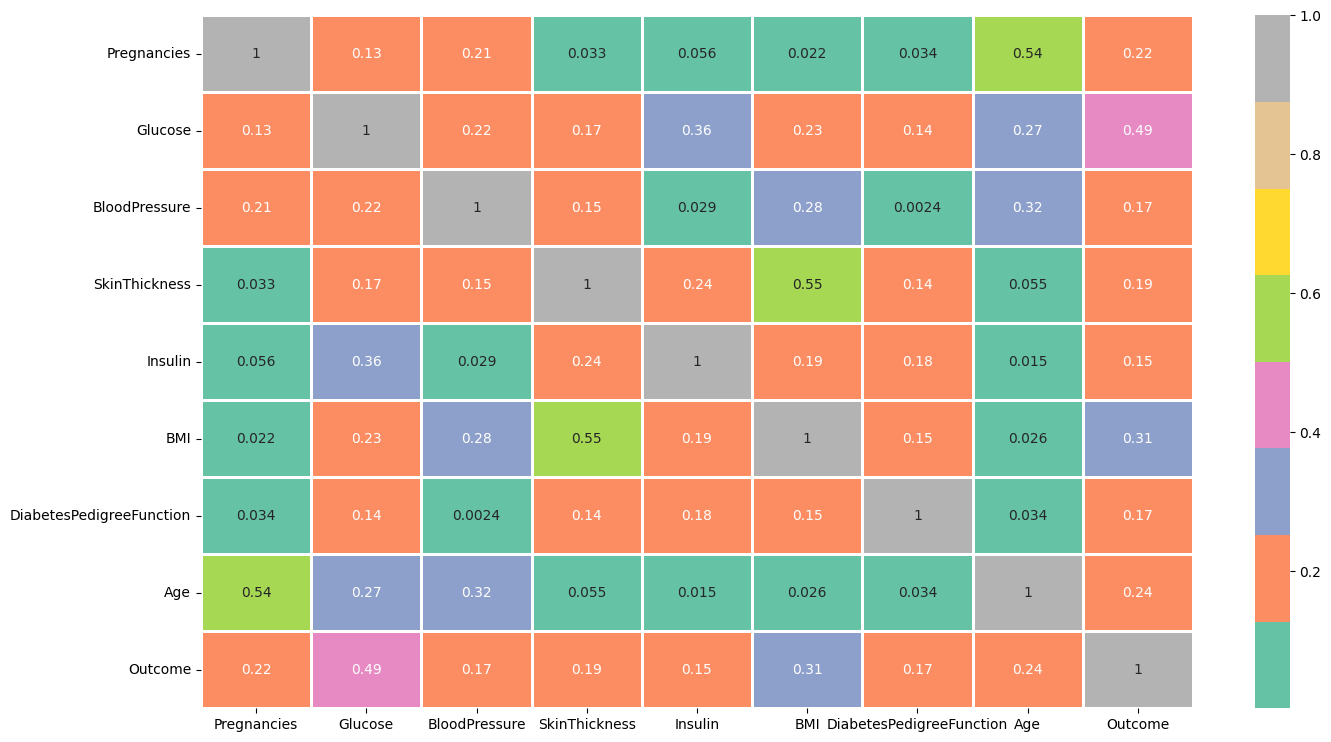

In [59]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(abs(corr), lw=1, annot=True, cmap='Set2')
plt.show()

In [60]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [61]:
# training and normalization of data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#df = df.drop('name', axis=1)


X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


In [62]:
print("X_train_scaled:")
print(X_train_scaled_df.head())

X_train_scaled:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.526397 -1.256881      -0.018995      -0.454871 -0.612697 -0.050247   
1     1.588046 -0.326051       0.808174      -0.340921 -0.612697 -0.598590   
2    -0.828460  0.571536      -2.169636      -0.910670 -0.120429 -0.526439   
3    -1.130523  1.302903      -1.838768      -0.454871 -0.612697 -1.507685   
4     0.681856  0.405316       0.642740       1.140426  2.570636  1.998825   

   DiabetesPedigreeFunction       Age  
0                 -0.490735 -1.035940  
1                  2.415030  1.487101  
2                  0.549161 -0.948939  
3                 -0.639291  2.792122  
4                 -0.686829  1.139095  


In [63]:
print("\nX_test_scaled:")
print(X_test_scaled_df.head())


X_test_scaled:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.681856 -0.791466      -1.177033       0.684627  0.882860  0.238355   
1    -0.526397 -0.326051       0.229156       0.570677 -0.612697  0.483666   
2    -0.526397 -0.459026      -0.680731      -0.454871 -0.612697 -0.223408   
3     1.285983 -0.492270       0.642740      -0.454871 -0.612697 -1.118073   
4     0.983919  0.471804       1.469910      -0.454871 -0.612697 -0.353278   

   DiabetesPedigreeFunction       Age  
0                 -0.116372  0.878091  
1                 -0.954231 -1.035940  
2                 -0.924520 -1.035940  
3                  1.149329  0.095078  
4                 -0.770021  1.487101  


In [64]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Missing values in X_train_scaled:")
print(X_train_scaled_df.isnull().sum())

Missing values in X_train_scaled:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC_{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC_{i+1}' for i in range(X_test_pca.shape[1])])

print("\nX_train_pca:")
print(X_train_pca_df.head())

print("\nX_test_pca:")
print(X_test_pca_df.head())


X_train_pca:
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7
0 -1.525452  0.398163 -0.959001 -0.084806  0.253615  0.292558 -0.421711
1  1.032893 -1.797361  0.354386  2.703722  0.259035  0.596645 -0.067901
2 -1.635729  1.025736  1.531266  0.448465 -0.380259 -1.263915 -0.091529
3 -0.655262 -1.533537  1.726713 -0.376289 -0.535809 -1.523893  2.874608
4  2.946111  0.573233  0.077814 -1.465347 -0.994064  1.087606 -0.205287

X_test_pca:
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7
0  0.344930 -0.006671  0.141883  0.126247 -1.888159  0.549900  0.348375
1 -0.483656  0.744827 -1.295695 -0.781737  0.152647 -0.304169 -0.162703
2 -1.600566  0.375652 -0.404180 -0.595994 -0.089265 -0.445650 -0.281834
3 -0.202980 -1.324160  0.122179  1.498454  0.230493  0.636337 -0.535882
4  0.836882 -2.299567 -0.350927 -0.519564  0.659308  0.096084  0.185821


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




X = data.drop('Outcome', axis=1)
y = data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_reshaped, y_train, epochs=100, batch_size=8, validation_split=0.2)

y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)


y_test = np.array(y_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Epoch 1/100
62/62 [==============================] - 3s 13ms/step - loss: 0.6807 - accuracy: 0.6029 - val_loss: 0.6514 - val_accuracy: 0.7480
Epoch 2/100
62/62 [==============================] - 0s 6ms/step - loss: 0.6183 - accuracy: 0.7475 - val_loss: 0.5846 - val_accuracy: 0.7480
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5474 - accuracy: 0.7637 - val_loss: 0.5209 - val_accuracy: 0.7561
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7617 - val_loss: 0.4891 - val_accuracy: 0.7561
Epoch 5/100
62/62 [==============================] - 0s 5ms/step - loss: 0.4755 - accuracy: 0.7678 - val_loss: 0.4729 - val_accuracy: 0.7724
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.7699 - val_loss: 0.4651 - val_accuracy: 0.7642
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4525 - accuracy: 0.7739 - val_loss: 0.4618 - val_accuracy: 0.7724
Epoch 8/100


In [68]:
from tensorflow.keras.models import load_model
import joblib
# Save the model to a file
model.save("diabetes.h5")
# Now load the model from the file
model=load_model("/content/diabetes.h5")

# Save the Keras model as a .sav file
joblib.dump(model, '/content/diabetes.sav')

['/content/diabetes.sav']

Logistic Regression¶


K-Nearest Neighbors¶


Random Forest¶
